In [29]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [9]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
X = X.fillna({'Age': X.Age.median()})

In [11]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [13]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

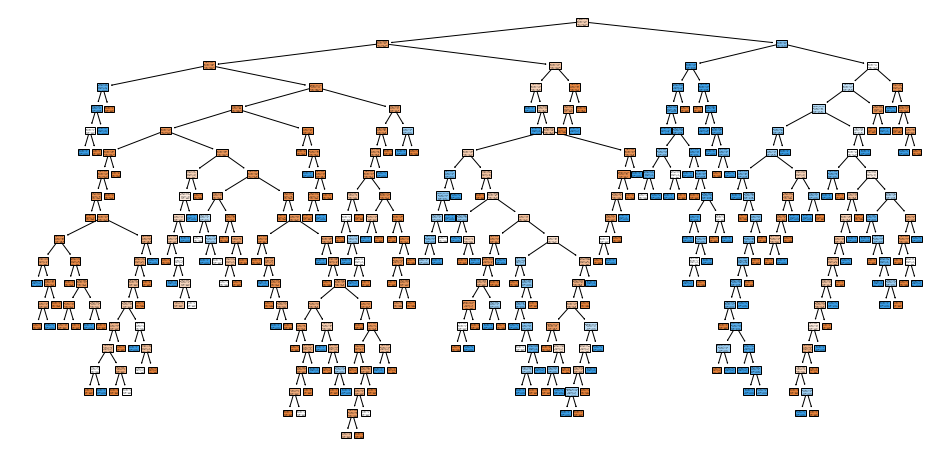

In [30]:
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Died', 'Survived'],
               filled=True);

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
X_train.shape, X_test.shape

((596, 10), (295, 10))

In [34]:
clf.score(X, y)

0.9797979797979798

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
clf.score(X_train, y_train)

0.9798657718120806

In [37]:
clf.score(X_test, y_test)

0.7694915254237288

In [42]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
clf.score(X_train, y_train)

0.8238255033557047

In [45]:
clf.score(X_test, y_test)

0.8203389830508474

In [58]:
max_depth_values = range(1, 100)

In [64]:
scores_data = pd.DataFrame()

In [65]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [66]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.796942


In [70]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', 
                           value_name='score')

In [73]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.796942
203,6,cross_val_score,0.793721
204,7,cross_val_score,0.791942
205,8,cross_val_score,0.791899
206,9,cross_val_score,0.803735
207,10,cross_val_score,0.786800


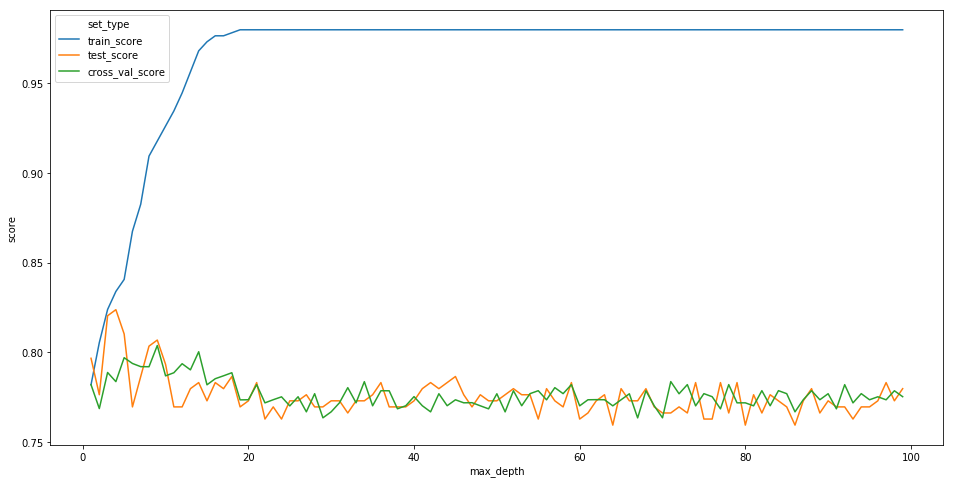

In [72]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [57]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7835799743626264

In [74]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [77]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [83]:
import numpy as np
np.random.seed(0)

In [84]:
df = pd.read_csv('train_iris.csv', index_col=0)
df.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [87]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = df.species

In [91]:
df_test = pd.read_csv('test_iris.csv', index_col=0)
df_test.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [92]:
X_test = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_test = df.species

In [93]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X, y)
    train_score = clf.score(X, y)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X, y, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score], 
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [94]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.796942


In [96]:
scores_data_long = pd.melt(scores_data, 
                           id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type', 
                           value_name='score')

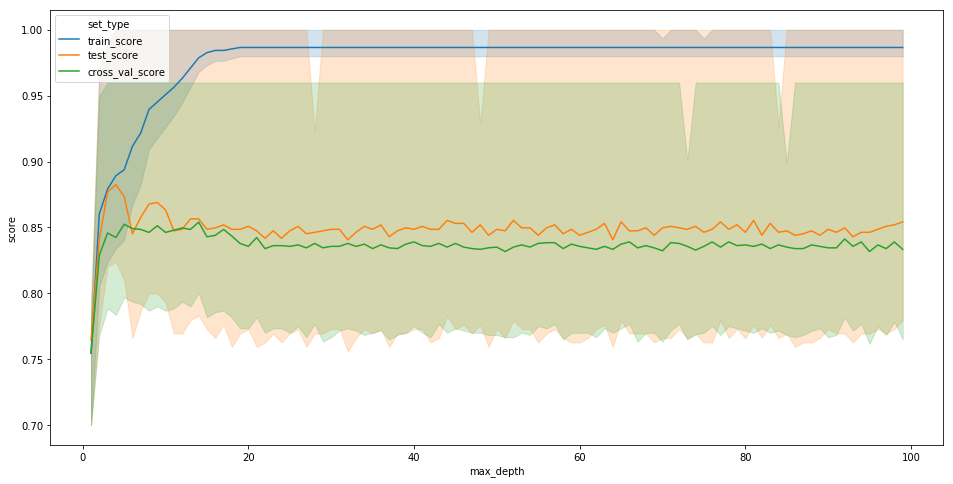

In [98]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long);

In [118]:
df_dogs_n_cats = pd.read_csv('dogs_n_cats.csv')
df_dogs_n_cats.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [119]:
y = df_dogs_n_cats['Вид']
X = df_dogs_n_cats[['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']]

In [120]:
clf_dnc = tree.DecisionTreeClassifier(criterion='entropy')

In [121]:
clf_dnc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [122]:
X.shape

(1000, 5)

In [123]:
df_dnc_test = pd.read_json('dataset_209691_15.txt')

In [124]:
df_dnc_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,27,32.4,1,1,0
1,28,33.6,1,1,0
10,21,25.2,1,0,0
11,23,27.6,1,1,0
12,31,37.2,1,1,0


In [125]:
df_dnc_test.shape

(100, 5)

In [135]:
n = clf_dnc.predict(df_dnc_test)

In [136]:
nn = pd.Series(n)

In [141]:
nn.value_counts()

собачка    52
котик      48
dtype: int64